In [3]:
import numpy as np
import pandas as pd

In [4]:
coins = np.random.binomial(1, 0.5, size=10)

In [5]:
coins

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0])

In [6]:
import matplotlib.pyplot as plt

(array([5., 5.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

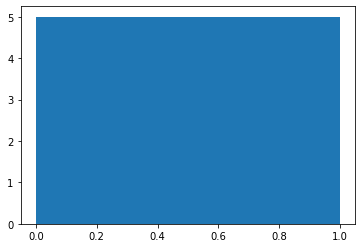

In [8]:
plt.hist(coins, bins=2)

In [9]:
np.mean(coins)

0.5

In [10]:
coins2 = np.random.binomial(2, 0.5, size=1000)

In [11]:
coins2[:5]

array([1, 1, 1, 2, 1])

In [12]:
np.mean(coins2)

1.009

(array([255., 481., 264.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <a list of 3 Patch objects>)

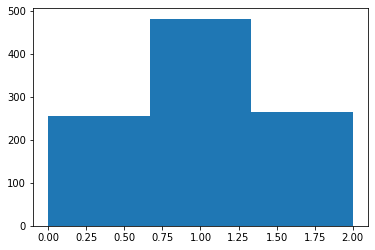

In [13]:
plt.hist(coins2, bins=3)

The histogram now has three peaks with a taller central one because there are now three values to choose from: 0, 1, or 2 heads. With 2 fair coins, it makes sense that in a normal distribution, there would be more occurrences of 1 head, since there is a 50% chance of each coin landing on heads.

In [14]:
coins5 = np.random.binomial(5, 0.5, size=1000)

In [15]:
coins5[:5]

array([2, 2, 2, 2, 2])

(array([ 25., 141., 335., 300., 173.,  26.]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <a list of 6 Patch objects>)

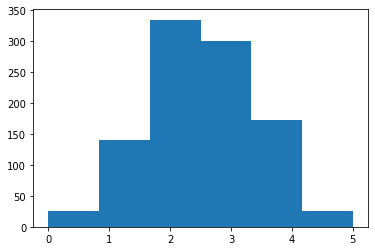

In [16]:
plt.hist(coins5, bins=6)

In [17]:
np.mean(coins5)

2.533

For some reason, the 1000 trials with 2 coins looked more evenly distributed

In [18]:
coins100 = np.random.binomial(100, 0.5, size=1000)

In [19]:
coins100[:5]

array([39, 33, 45, 44, 47])

(array([  3.,   0.,   1.,   0.,   4.,  25.,   7.,  17.,  31.,  27., 109.,
         58.,  76.,  91.,  90., 160.,  61.,  62.,  38.,  42.,  57.,   9.,
         15.,   6.,  11.]),
 array([33. , 34.2, 35.4, 36.6, 37.8, 39. , 40.2, 41.4, 42.6, 43.8, 45. ,
        46.2, 47.4, 48.6, 49.8, 51. , 52.2, 53.4, 54.6, 55.8, 57. , 58.2,
        59.4, 60.6, 61.8, 63. ]),
 <a list of 25 Patch objects>)

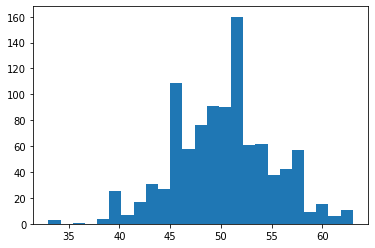

In [20]:
plt.hist(coins100, bins=25)

In [21]:
mean = np.mean(coins100)

In [22]:
var = np.var(coins100)

In [23]:
std = np.std(coins100)

In [24]:
import seaborn as sns

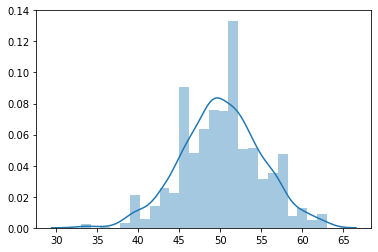

In [25]:
sns.distplot(coins100)

In [30]:
fs = pd.read_csv('./fatherson.csv.bz2', '\t')

In [31]:
fs.shape

(1078, 2)

In [32]:
fs.count()

fheight    1078
sheight    1078
dtype: int64

There are 1078 observations in the fatherson dataset, without any nulls

The variables in this data are ratio measures, because the absolute numbers make sense and there exists a 0 value. The expected range is ~200 cm and continuous values

In [34]:
fstats = [np.mean(fs.fheight), np.median(fs.fheight), np.std(fs.fheight), [np.min(fs.fheight), np.max(fs.fheight)]]

In [35]:
sstats = [np.mean(fs.sheight), np.median(fs.sheight), np.std(fs.sheight), [np.min(fs.sheight), np.max(fs.sheight)]]

In [36]:
fstats

[171.9252319109462, 172.1, 6.9691111282851566, [149.9, 191.6]]

Stats for the father: mean = 171.9, median = 172, standard deviation = 6.97, range = \[149.9, 191.6\]

In [37]:
sstats

[174.45723562152133, 174.3, 7.147395867229333, [148.6, 199.0]]

Stats for the sons: mean = 174.45, median = 174.3, standard deviation = 7.15, range = \[148.6, 199.0\]

According to the statistics, it seems that on average, sons are taller than fathers. However, the ranges do overlap

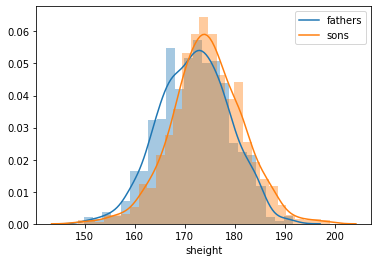

In [38]:
sns.distplot(fs.fheight, kde_kws={'label':"fathers"})
sns.distplot(fs.sheight, kde_kws={'label':'sons'})

Based on the plots, it appears that sons on average are taller than their fathers. The sons plot is also more normally distributed than the fathers plot, which is a little distorted

In [39]:
combined = np.concatenate((fs.fheight, fs.sheight))

In [81]:
fsmean = np.mean(combined)
fsmean

173.19123376623375

The average mean of the combined heights is 173.1

In [82]:
fsstd = np.std(combined)
fsstd

7.171446820428152

The standard deviation of the combined heights is 7.17

In [67]:
t2 = (np.mean(fs.fheight) - np.mean(fs.sheight)) / fsstd
t2

-0.3530673480506927

In [70]:
fathers = np.random.normal(fsmean, fsstd, size=1078)
sons = np.random.normal(fsmean, fsstd, size=1078)


In [72]:
np.mean(fathers) - np.mean(sons)

0.12675278171082027

In [74]:
means = [np.mean(np.random.normal(fsmean, fsstd, size=1078)) - np.mean(np.random.normal(fsmean, fsstd, size=1078)) for i in range(1000)]

In [75]:
np.mean(means)

-0.02231493069415123

The mean of the mean differences is -0.02. This means that on average, there can be a 0.02 differnce in the heights of father and sons purely due to chance

In [76]:
np.std(means)

0.318803153377012

In [78]:
np.max(means)

1.1638209994426063

The largest mean difference in my sample is 1.16

In [87]:
np.quantile(means, [0.025, 0.975])

array([-0.66639072,  0.60271172])

In [83]:
np.mean(fs.fheight) - np.mean(fs.sheight)

-2.5320037105751396

The 95% quantiles of the difference in the sample with a two-tailed test are \[-0.66, 0.6\]. The actual difference of the means is -2.5, which falls outside this interval. This means that it is most likely that this difference is not due to chance

In [88]:
means2 = [np.mean(np.random.normal(fsmean, fsstd, size=1078)) - np.mean(np.random.normal(fsmean, fsstd, size=1078)) for i in range(1000000)]

In [59]:
# fs['diff'] = fs['fheight'] - fs['sheight']

In [64]:
# std2 = np.std(fs['diff'])

In [73]:
# t3 = (np.mean(fs.fheight) - np.mean(fs.sheight)) / std2
# t3

In [44]:
import math

In [54]:
se = math.sqrt(np.var(fs.fheight) / len(fs.fheight) + np.var(fs.sheight) / len(fs.sheight))
se

0.30404474575682605

In [55]:
t = (np.mean(fs.fheight) - np.mean(fs.sheight)) / se

In [56]:
t

-8.327733815207013